<a href="https://colab.research.google.com/github/jclee0109/deep_learning_self_study/blob/main/4_1_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀
## 럭키백의 확률
### 데이터 준비하기

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_input.head()

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340


In [7]:
fish_target = fish['Species'].to_numpy()

In [10]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)

(119, 5)
(40, 5)
(119,)


### k-NN 분류기의 확률 예측

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.7478991596638656
0.5


In [12]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [15]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8991596638655462
0.725


In [16]:
print(kn.predict(test_scaled[:5]))

['Parkki' 'Bream' 'Perch' 'Perch' 'Perch']


In [17]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     1.     0.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.     0.     0.3333]
 [0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]]


In [21]:
distances, indexes = kn.kneighbors(test_scaled[2:3])
print(train_target[indexes])

[['Whitefish' 'Perch' 'Perch']]


In [23]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


## 로지스틱 회귀

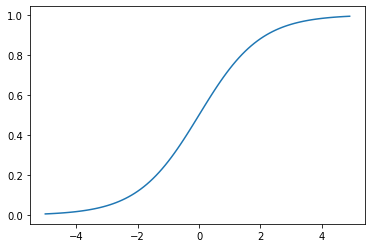

In [24]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))

plt.plot(z, phi)
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [25]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [30]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
print(bream_smelt_indexes)

[False False  True  True  True  True  True False False  True False False
 False False  True False False False False False False  True  True False
  True  True False False False False  True False False False  True  True
 False False False False False False False False False False  True False
 False False  True  True  True  True False  True  True False False False
  True False False False False False False  True False False  True False
 False False False  True False  True False False False False  True  True
 False False False False  True False  True  True  True False False False
  True False False False False False False  True  True  True False False
  True  True False False False False False False False  True False]


In [31]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.score(train_bream_smelt, target_bream_smelt))

1.0


In [34]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Bream' 'Bream' 'Smelt' 'Bream']


In [35]:
print(lr.classes_)

['Bream' 'Smelt']


In [36]:
print(lr.coef_, lr.intercept_)

[[-0.43477762 -0.63300864 -0.72131612 -1.02693637 -0.75654001]] [-2.29980266]


In [38]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-5.20089052 -3.04487158 -5.62011606  3.50365185 -4.07545566]


In [40]:
from scipy.special import expit
print(expit(decisions))

[0.00548144 0.0454394  0.00361113 0.9707915  0.01670082]


In [42]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99451856 0.00548144]
 [0.9545606  0.0454394 ]
 [0.99638887 0.00361113]
 [0.0292085  0.9707915 ]
 [0.98329918 0.01670082]]


In [43]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9411764705882353
0.85


In [45]:
lr.predict(test_scaled[:5])

array(['Parkki', 'Bream', 'Perch', 'Perch', 'Perch'], dtype=object)

In [46]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [48]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.009 0.78  0.006 0.    0.179 0.    0.025]
 [0.989 0.004 0.    0.    0.    0.    0.007]
 [0.016 0.033 0.423 0.008 0.32  0.    0.2  ]
 [0.    0.    0.94  0.006 0.032 0.    0.021]
 [0.028 0.    0.647 0.002 0.    0.    0.322]]


In [50]:
print(lr.coef_, lr.intercept_)

[[-1.57980329 -0.9481479   2.94845522  7.70353852 -0.60283139]
 [ 0.33412387 -1.84817295 -3.6724033   6.79808131 -2.07559978]
 [ 3.28427378  6.68979888 -7.6169168  -6.13181259  3.89535449]
 [ 0.12268028  3.65884555  4.01772813 -3.48170138 -1.58436055]
 [-2.46724295 -5.35206112  4.6076343  -0.4392989   1.95553184]
 [-1.14665526 -0.61332085 -1.12497777 -5.24683087 -3.58342619]
 [ 1.45262358 -1.58694162  0.84048023  0.79802391  1.9953316 ]] [  1.05240167   0.62618983   3.65215499   0.11879764   2.03410856
 -10.69158351   3.20793081]


In [51]:
decision = lr.decision_function(test_scaled[:5])

In [52]:
print(np.round(decision, decimals=3))

[[  0.217   4.705  -0.084  -3.809   3.235  -5.527   1.262]
 [ 11.296   5.801  -1.723  -0.906   0.778 -21.572   6.327]
 [ -0.03    0.676   3.229  -0.685   2.95   -8.622   2.482]
 [ -2.3    -1.713   5.919   0.825   2.552  -7.384   2.1  ]
 [  4.806  -1.66    7.936   2.135   0.652 -21.11    7.24 ]]


In [56]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.009 0.78  0.006 0.    0.179 0.    0.025]
 [0.989 0.004 0.    0.    0.    0.    0.007]
 [0.016 0.033 0.423 0.008 0.32  0.    0.2  ]
 [0.    0.    0.94  0.006 0.032 0.    0.021]
 [0.028 0.    0.647 0.002 0.    0.    0.322]]
